<a href="https://colab.research.google.com/github/deepaksirohiwal/Deep_Learning_with_PyTorch/blob/main/cifar10_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#imports
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim


import matplotlib.pyplot as plt
import numpy as np
torch.manual_seed(17)

In [ ]:
#setting the device
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [ ]:
transform=transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))]
)

In [ ]:
batch_size=10
#downloading the images
train_data=torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)

test_data=torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

#dataloader
train_loader=torch.utils.data.DataLoader(train_data,
                                          batch_size=batch_size,
                                          shuffle=True,
                                          )
test_loader=torch.utils.data.DataLoader(test_data,
                                        batch_size=batch_size,
                                        shuffle=True)

classes=('plane','car','bird','cat','deer','dog','frog','horse','ship','truck')

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
# shape of a batch
for image, labels in train_loader:
  print('image-shape :',image.shape)
  break

image-shape : torch.Size([10, 3, 32, 32])


In [ ]:
# checking images in the dataset
from torchvision.utils import make_grid

def show_batch(dl):
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(12, 6))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images, nrow=16).permute(1, 2, 0))
        break

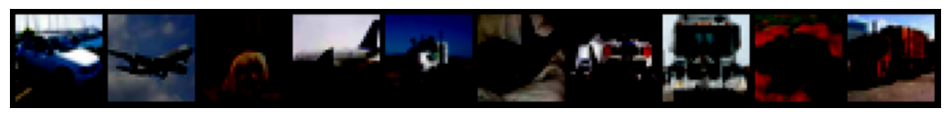

In [ ]:
show_batch(train_loader)

In [ ]:
# CNN model
model = nn.Sequential(
    nn.Conv2d(3, 32, kernel_size=3, padding=1),
    nn.BatchNorm2d(32),
    nn.ReLU(),
    nn.Conv2d(32, 64, kernel_size=3,  padding=1),
    nn.BatchNorm2d(64),
    nn.ReLU(),
    nn.MaxPool2d(2, 2), # output: 64 x 16 x 16
    nn.Dropout(0.25),

    nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
    nn.BatchNorm2d(128),
    nn.ReLU(),
    nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
    nn.BatchNorm2d(128),
    nn.ReLU(),
    nn.MaxPool2d(2, 2), # output: 128 x 8 x 8
    nn.Dropout(0.25),

    nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
    nn.BatchNorm2d(256),
    nn.ReLU(),
    nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
    nn.BatchNorm2d(6),
    nn.ReLU(),
    nn.MaxPool2d(2, 2), # output: 256 x 4 x 4

    nn.Flatten(),
    nn.Linear(256*4*4, 1024),
    nn.ReLU(),
    nn.Linear(1024, 512),
    nn.ReLU(),
    nn.Linear(512, 10))

In [ ]:

for image, labels in train_loader:
  print('image-shape :',image.shape)
  out= model(image)
  print('out-shape: ', out.shape)
  print('out[0]', out[0])
  break

image-shape : torch.Size([10, 3, 32, 32])
out-shape:  torch.Size([10, 10])
out[0] tensor([ 0.0130, -0.0994, -0.0037, -0.0173, -0.0457,  0.0763,  0.0704, -0.0888,
         0.0344,  0.0818], grad_fn=<SelectBackward0>)


In [ ]:
learning_rate=0.001

# Initialize loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
#moving model to the available device
model= model.to(device)

In [ ]:
#traing model on the train_loader
n_total_steps= len(train_loader)
num_epochs=11
for epoch in range(num_epochs):
    model.train()

    for batch_idx, (inputs, labels) in enumerate(train_loader):
        inputs, labels = inputs.to(device), labels.to(device)

        #forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        #back propagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()


        if batch_idx % 2000 == 0:
            print(f"Epoch [{epoch+1}/{num_epochs}], Step [{batch_idx}/{len(train_loader)}], Loss: {loss.item():.4f}")
print("Finished training")

Epoch [1/11], Step [0/5000], Loss: 2.3015
Epoch [1/11], Step [2000/5000], Loss: 2.2131
Epoch [1/11], Step [4000/5000], Loss: 1.3940
Epoch [2/11], Step [0/5000], Loss: 0.3833
Epoch [2/11], Step [2000/5000], Loss: 1.3105
Epoch [2/11], Step [4000/5000], Loss: 0.9777
Epoch [3/11], Step [0/5000], Loss: 1.7825
Epoch [3/11], Step [2000/5000], Loss: 0.8680
Epoch [3/11], Step [4000/5000], Loss: 1.2793
Epoch [4/11], Step [0/5000], Loss: 0.7726
Epoch [4/11], Step [2000/5000], Loss: 1.2474
Epoch [4/11], Step [4000/5000], Loss: 0.5317
Epoch [5/11], Step [0/5000], Loss: 0.2891
Epoch [5/11], Step [2000/5000], Loss: 0.3780
Epoch [5/11], Step [4000/5000], Loss: 0.4759
Epoch [6/11], Step [0/5000], Loss: 0.5456
Epoch [6/11], Step [2000/5000], Loss: 0.5139
Epoch [6/11], Step [4000/5000], Loss: 0.3699
Epoch [7/11], Step [0/5000], Loss: 0.3406
Epoch [7/11], Step [2000/5000], Loss: 1.1770
Epoch [7/11], Step [4000/5000], Loss: 0.1497
Epoch [8/11], Step [0/5000], Loss: 0.0473
Epoch [8/11], Step [2000/5000], Lo

In [ ]:
# Testing loop
with torch.no_grad():
    correct = 0
    total = 0

    n_class_correct=[0 for i in range(10)]
    n_class_samples=[0 for i in range(10)]
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)

        _, predicted = torch.max(outputs, 1)

        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        for i in range(batch_size):
            label= labels[i]
            pred= predicted[i]
            if(label==pred):
                n_class_correct[label]+=1
            n_class_samples[label]+=1

    accuracy = 100 * correct / total
    print(f"Test Accuracy: {accuracy:.2f}%")

    for i in range(10):
        acc= 100.0 * n_class_correct[i]/n_class_samples[i]
        print(f"Accuracy of the class {classes[i]}:{acc}%")


Test Accuracy: 81.12%
Accuracy of the class plane:85.5%
Accuracy of the class car:88.4%
Accuracy of the class bird:70.2%
Accuracy of the class cat:66.0%
Accuracy of the class deer:74.1%
Accuracy of the class dog:77.9%
Accuracy of the class frog:85.2%
Accuracy of the class horse:84.7%
Accuracy of the class ship:85.3%
Accuracy of the class truck:93.9%


Here we got an accuracy of 81.12%